In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

# 1. Data Preprocessing

In [12]:
# get califronia housing data, and get shape, features
housing = fetch_california_housing(as_frame = True)
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

# convert the housing data into data frame in pandas
df = housing.frame

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [14]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## 1.1 Handle Missing Vaules

- there is no missing values

In [17]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 1.2 Feature scaling/normalization and Train/Test split (80/20)

- our goal is to predict median house values, thus target column is MedHouseVal and features are others
- used StandardScaler() like we learned in class
- used Train/Test to 80/20

In [22]:
# features
X = df.drop(columns=["MedHouseVal"])
# goal
y = df['MedHouseVal']


scaler = StandardScaler()

# using random_state to 2 get consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# normalize features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1.3 Exploratory data analysis

### Histogram of Median values

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64


<Axes: >

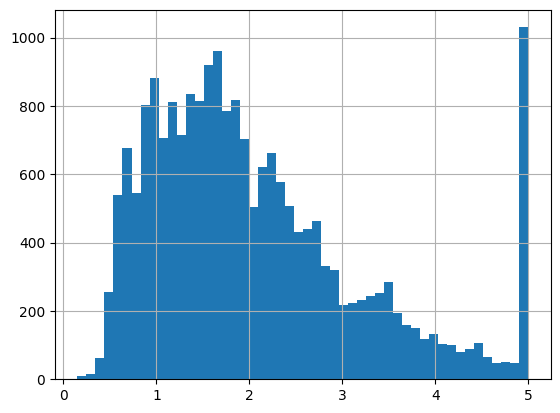

In [26]:
print(df["MedHouseVal"].describe())
df["MedHouseVal"].hist(bins=50)

### Correation Heatmap

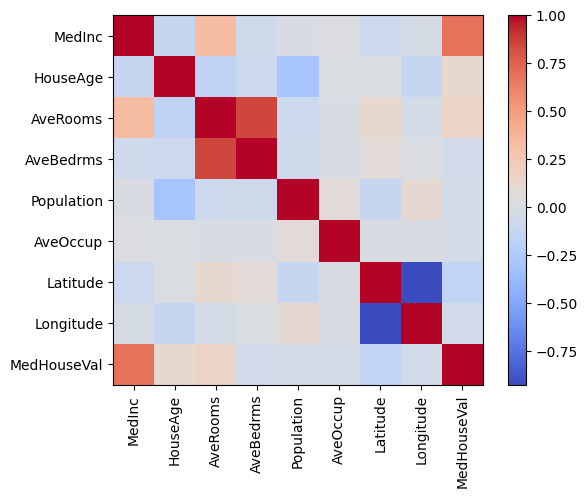

In [30]:
corr = df.corr(numeric_only=True)
plt.imshow(corr, cmap = 'coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

### Median House values by Geographical Data

<Axes: xlabel='Longitude', ylabel='Latitude'>

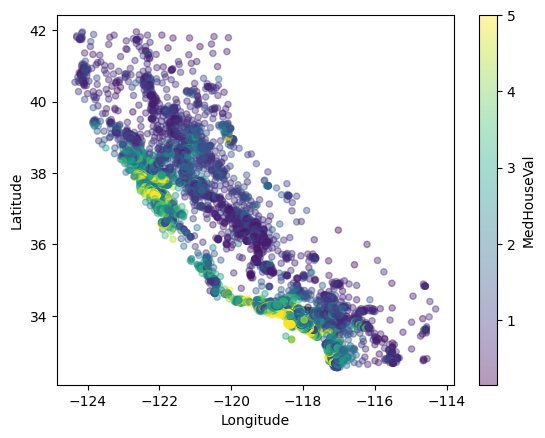

In [31]:
df.plot.scatter(x="Longitude", y="Latitude", c="MedHouseVal", colormap="viridis", alpha=0.4)


# 2. Feature Engineering

## 2.1 Polynomial Features

In [45]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly  = poly.transform(X_test_scaled)

feature_names = poly.get_feature_names_out(X_train.columns)

X_train_poly_df = pd.DataFrame(
    X_train_poly,
    columns=feature_names,
    index=X_train.index
)


X_train_poly_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc^2,MedInc HouseAge,MedInc AveRooms,MedInc AveBedrms,MedInc Population,MedInc AveOccup,MedInc Latitude,MedInc Longitude,HouseAge^2,HouseAge AveRooms,HouseAge AveBedrms,HouseAge Population,HouseAge AveOccup,HouseAge Latitude,HouseAge Longitude,AveRooms^2,AveRooms AveBedrms,AveRooms Population,AveRooms AveOccup,AveRooms Latitude,AveRooms Longitude,AveBedrms^2,AveBedrms Population,AveBedrms AveOccup,AveBedrms Latitude,AveBedrms Longitude,Population^2,Population AveOccup,Population Latitude,Population Longitude,AveOccup^2,AveOccup Latitude,AveOccup Longitude,Latitude^2,Latitude Longitude,Longitude^2
2072,-1.258403,-1.795939,-0.425185,0.088301,-0.032827,0.024660,0.534564,-0.137635,1.583578,2.260015,0.535054,-0.111119,0.041309,-0.031032,-0.672697,0.173200,3.225396,0.763606,-0.158584,0.058955,-0.044287,-0.960044,0.247184,0.180782,-0.037544,0.013957,-0.010485,-0.227288,0.058520,0.007797,-0.002899,0.002177,0.047203,-0.012153,0.001078,-0.000810,-0.017548,0.004518,0.000608,0.013182,-0.003394,0.285758,-0.073575,0.018943
10600,1.610623,-1.637178,0.247344,-0.151479,-0.494784,-0.049867,-0.909979,0.879836,2.594106,-2.636877,0.398379,-0.243976,-0.796910,-0.080317,-1.465633,1.417083,2.680353,-0.404947,0.247999,0.810049,0.081641,1.489798,-1.440448,0.061179,-0.037468,-0.122382,-0.012334,-0.225078,0.217622,0.022946,0.074949,0.007554,0.137843,-0.133277,0.244811,0.024673,0.450243,-0.435328,0.002487,0.045378,-0.043875,0.828062,-0.800632,0.774111
2494,-1.220425,-0.287715,-0.580880,-0.210346,-0.435204,0.116155,0.455091,-0.312201,1.489436,0.351134,0.708921,0.256712,0.531134,-0.141758,-0.555404,0.381017,0.082780,0.167128,0.060520,0.125215,-0.033419,-0.130936,0.089825,0.337422,0.122186,0.252801,-0.067472,-0.264353,0.181351,0.044245,0.091543,-0.024433,-0.095727,0.065670,0.189403,-0.050551,-0.198057,0.135871,0.013492,0.052861,-0.036264,0.207107,-0.142080,0.097469
4284,-1.233736,0.188566,-1.172623,-0.190753,-0.723603,-0.041209,-0.713633,0.620480,1.522104,-0.232641,1.446706,0.235338,0.892735,0.050841,0.880435,-0.765509,0.035557,-0.221117,-0.035970,-0.136447,-0.007771,-0.134567,0.117002,1.375044,0.223681,0.848514,0.048322,0.836823,-0.727589,0.036387,0.138029,0.007861,0.136127,-0.118358,0.523602,0.029819,0.516387,-0.448982,0.001698,0.029408,-0.025569,0.509273,-0.442795,0.384996
16541,0.114837,-0.605236,-0.107958,-0.204368,-0.263373,-0.003921,1.011403,-0.830911,0.013188,-0.069504,-0.012398,-0.023469,-0.030245,-0.000450,0.116147,-0.095420,0.366310,0.065340,0.123691,0.159403,0.002373,-0.612137,0.502897,0.011655,0.022063,0.028433,0.000423,-0.109189,0.089704,0.041766,0.053825,0.000801,-0.206698,0.169812,0.069366,0.001033,-0.266377,0.218840,0.000015,-0.003966,0.003258,1.022936,-0.840386,0.690413


## 2.2 Log transformations

In [49]:
cols_to_log = ["MedInc", "AveRooms", "AveBedrms", "Population", "AveOccup"]

X_train_log = X_train.copy()
X_test_log  = X_test.copy()

X_train_log[cols_to_log] = np.log1p(X_train_log[cols_to_log])
X_test_log[cols_to_log]  = np.log1p(X_test_log[cols_to_log])

X_train_log_scaled = scaler.fit_transform(X_train_log)
X_test_log_scaled  = scaler.transform(X_test_log)

print(X_train[cols_to_log].head())
print(X_train_log[cols_to_log].head())

       MedInc  AveRooms  AveBedrms  Population  AveOccup
2072   1.4817  4.443645   1.134293      1397.0  3.350120
10600  6.9133  5.976471   1.026471       862.0  2.535294
2494   1.5536  4.088785   1.000000       931.0  4.350467
4284   1.5284  2.740088   1.008811       597.0  2.629956
16541  4.0815  5.166667   1.002688      1130.0  3.037634
         MedInc  AveRooms  AveBedrms  Population  AveOccup
2072   0.908944  1.694449   0.758135    7.242798  1.470203
10600  2.068545  1.942543   0.706296    6.760415  1.262796
2494   0.937504  1.627039   0.693147    6.837333  1.677184
4284   0.927587  1.319109   0.697543    6.393591  1.289221
16541  1.625606  1.819158   0.694490    7.030857  1.395659
